# 2. Accessing Data

_Damian Trilling and Penny Sheets_

This notebook is meant to show you different ways of accessing data. Data can be
available as (a) local files (on your computer), (b) remote files (somewhere
else), or (c) APIs (application programming interfaces). We will show you ways
for dealing with all of these.


But before we do that, we need to import some modules into Jupyter that will
help us find and read data. You already know our basic module, pandas. Let's
import it again just in case your computer cleared it during the break (or in
case you're doing this notebook again separately, after class).


### Importing Modules

It is a good custom to import all modules that you need at the beginning of your
notebook. We'll explain in the lesson (or in subsequent weeks) what these
modules do.


In [42]:
import pandas as pd
from pprint import pprint
import json
import matplotlib.pyplot as plt
from collections import Counter
import requests
import seaborn as sns
%matplotlib inline

---


## CSV files


Remember what we did in the first part of class today, working with that Iris
dataset? We used pandas to read a CSV file directly from the web and gave its
descriptive statistics.


In [43]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If we want to, we could also plot a histogram:


<Axes: >

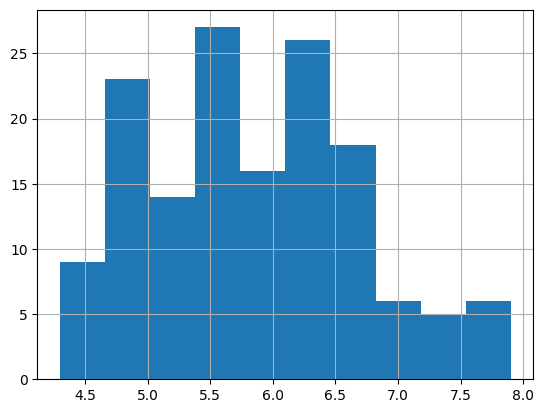

In [45]:
iris.sepal_length.hist()

Let's say you want to configure that histogram differently, or get axis lables,
etc. Use the help menu to see how to do that:


In [46]:
iris.sepal_length.hist?


Signature:
iris.sepal_length.hist(
    by=None,
    ax=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    figsize: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Draw histogram of the input series using matplotlib.

Parameters
----------
by : object, optional
    If passed, then used to form histograms for separate groups.
ax : matplotlib axis object
    If not passed, uses gca().
grid : bool, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis labels.
ylabelsize : int, default None
    If specified changes the y-axis label size.
yrot : float, default None
    Rotation of y axis labels.
figsize : tuple, default None
    Figure s

## Downloading data

Probably, if you really want to analyze a dataset, you want to store it locally
(=on your computer). Let's download a file with some stock exchange ratings:
https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/stock.csv

Download it (file-save as or right-clicking) as "all file types" (or .csv); be
sure that the extension is correct. Be sure to save it IN THE SAME FOLDER as
this jupyter notebook. (Otherwise jupyter won't find it.)


## Note!!! Not all CSV files are the same...

CSV stands for Comma Seperated Value, which indicates that it consists of values
(columns) seperated by commas. Just open a CSV file in an editor like Notepad or
TextEdit instead of in Excel to understand what we mean.

Unfortunately, there are many different dialects. For instance, sometimes, a
semicolon or a tab is used instead of a comma; sometimes, the first line of a
CSV file contains column headers, sometimes not) You can indicate these type of
details yourself if pandas doesn't guess correctly.

Pay special attention when opening a CSV file with Excel: Excel changes the
formatting! For instance, it can happen that you open a file that uses commas as
seperators in Excel, and when you save it, it suddenly uses semicolons instead.

Another reason not to open your files in Excel first: Excel often creates a
strange 'encoding' of the characters that causes problems here. This is why we
work just with the raw .csv file if possible. If you are getting an encoding
error, the first step is to re-download the data and do NOT open it in excel
(even by mistake, by double-clicking on it).

We can then open it in the same way as we did before by providing its filename:


In [47]:
# stockdata = pd.read_csv('stock.csv') # if you downloaded and saved it locally
stockdata = pd.read_csv('https://raw.githubusercontent.com/damian0604/bdaca/master/ipynb/stock.csv') # when reading directly from source (online)

Let's have a look...


In [48]:
stockdata

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-01-01,21.095,21.095,21.095,21.095,0,20.6742
1,2015-12-31,21.135,21.140,20.915,21.095,1680700,20.6742
2,2015-12-30,21.330,21.375,21.110,21.185,5476800,20.7624
3,2015-12-29,21.000,21.410,20.995,21.325,6261600,20.8996
4,2015-12-28,21.440,21.450,20.705,20.880,5168400,20.4635
...,...,...,...,...,...,...,...
518,2014-01-07,25.810,26.065,25.720,26.030,5330200,22.9539
519,2014-01-06,26.015,26.030,25.790,25.810,4775300,22.7599
520,2014-01-03,26.000,26.195,25.875,26.065,4298100,22.9848
521,2014-01-02,25.985,26.130,25.855,25.920,5113500,22.8569


The lefthand column here--called the index--gives you numbers in this case;
these are simply the case numbers for each 'row' in the dataset; they may or may
not have any meaning on their own, depending on the dataset. You can also -
later in this notebook and later in subsequent weeks - learn how to change these
numbers or assign a different column to be the index.


Because this data seems to be ordered by date in some way, it might be
interesting to explore it by making a plot. In this case the plot is different
than the histogram; it's not about frequencies of specific values, but rather a
plot of all the cases at their value of 'low'.

We are using a method here called 'plot', provided by pandas.


<Axes: >

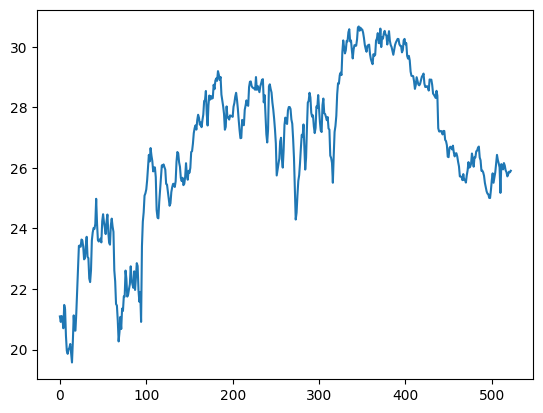

In [49]:
stockdata['Low'].plot()

## Trouble with your CSV files?

For more info on how to format your 'read_csv' commands, or if you're running
into problems related to the comma-versus-tab-versus-semicolon issue, look at
the help function:


In [50]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

## What if the data isn't in .csv format, but is online?

There is actually a very simple, brilliant, scraping tool that allows you to
grab content from tables online and turn that into a csv file. Then you can use
the tools we just used to analyze the csv file (including saving it to your
computer and importing it into jupyter for analysis). The tool is called
read_html and allows you to basically put in any website URL and scrape the
tables from it. It probably won't work with all websites (and probably not
everything it scrapes is relevant/useful to you), but, it is really handy when
it does work. Let's look, for example, at wikipedia's page involving the premier
Dutch football league.

First, load the URL into your browswer in another tab to look at the original
page.


In [51]:
alltables = pd.read_html('https://en.wikipedia.org/wiki/Eredivisie')

Look at the following code carefully to see what we're doing here. We're
introducing a new method ("format") which works for any string; this fills in a
value between curly brackets. We also are using function we already know from
the first part of today's lesson: "len".


In [52]:
print('We have downloaded {} tables'.format(len(alltables)))

We have downloaded 21 tables


Here is another, perhaps simpler way to do this, but also less versatile if you
want to do fancier stuff someday.

**The point here is that there are multiple ways to do many things in python; we
just want you to master one way and know why it's useful to you.**


In [53]:
print('We have downloaded', len(alltables), 'tables.')

We have downloaded 21 tables.


Let's look at, say, the third table in this set.


In [54]:
alltables[2]
#why is this not 3? It is because python uses 0-based indexing, which means that data, values, rows, and items 
#in lists, which you've seen in your coding tutorials, all start at 0. So the first object in a list or index
#is always in position "0", and the second in position "1", and so on.  In this case, to get the 3rd table in
#this new little set of tables, we have to specify "2" rather than "3".

,Club,Winner,Runner-up,Winning years
0,Ajax,36,23,"1917–18, 1918–19, 1930–31, 1931–32, 1933–34, 1..."
1,PSV,25,16,"1928–29, 1934–35, 1950–51, 1962–63, 1974–75, 1..."
2,Feyenoord,16,22,"1923–24, 1927–28, 1935–36, 1937–38, 1939–40, 1..."
3,HVV Den Haag,10,1,"1890–91, 1895–96, 1899–1900, 1900–01, 1901–02,..."
4,Sparta Rotterdam,6,–,"1908–09, 1910–11, 1911–12, 1912–13, 1914–15, 1..."
5,RAP,5,3,"1891–92, 1893–94, 1896–97, 1897–98, 1898–99"
6,Go Ahead Eagles,4,5,"1916–17, 1921–22, 1929–30, 1932–33"
7,Koninklijke HFC,3,3,"1889–90, 1892–93, 1894–95"
8,Willem II,3,1,"1915–16, 1951–52, 1954–55"
9,HBS Craeyenhout,3,–,"1903–04, 1905–06, 1924–25"


Now we can save this table to a csv file, which we will call 'test':


In [55]:
alltables[2].to_csv('test.csv')

Now, see if you can go back and read in this test.csv file, have a look at the
dataset.

If we had more time, we would try to figure out how to rename the columns, and
play around with plotting the number of times each team won, for example. (Try
this at home, and see if you can do it! Using the read help command from earlier
should help you figure out how to rename columns...or when in doubt, just search
online for help!)


## JSON files

Another type of file we frequently encounter online is the so-called "jason"
file - aka, JSON. JSON files allow for nested data structures--like databases.

JSON is (basically) the same as a collection of Python dicts (dictionaries--we
haven't talked about these yet in class, but you did learn about this in your
coding tutorials. As a reminder, dicts are collections of key:value pairs, which
means you have a category of something (key) and values within it (values)).
I'll explain this in class more. Bottom line: it's very easy to look up things
by their key, but not by their values. So, knowing our way around these dicts
and how they are nested within one another - in a json file - is important.

Let's download such a file and store it in the same directory as your jupyter
notebook. Download
https://raw.githubusercontent.com/FeLoe/data_journalism/refs/heads/master/datasets/EtenDrinken.json
.

First, see what happens if you load this link in your browser. You can get a
feel for the structure of the dataset, if your browser is relatively fancy.

Next: we could use pandas to put the JSON file into a table (see next command)
-- but as you see, because the data is _nested_, we still have dicts within some
of the cells:

**Note:** The location (often called _path_) where you stored the file is
important to remember when you load the data into your notebook. I have saved
the json file to a folder called _datasets_, which is located one folder 'above'
the current folder where our notebook reside in. So, I have to tell Python to go
back one folder ('../'), then into the datasets folder (datasets/), and from
there open the file 'EtenDrinken.json'. If you stored the datafile in the same
folder as your notebook is in, you can just load it by providing the file name!

**Where am I?** If you are unsure where your notebook is running from, simply
use the following cell magic to get the path to your current notebook:


In [56]:
!pwd

/Users/felicialoecherbach/Documents/GitHub/data_journalism/notebooks


In [57]:
pd.read_json('EtenDrinken.json')
# pd.read_json('EtenDrinken.json') if your file is in the same folder as this notebook

,trcid,title,details,types,location,urls,media,dates,lastupdated,eigenschappen
0,853c93aa-4599-41ad-9d79-638902925dc9,Eetsalon van Dobben B.V.,"{'de': {'language': 'de', 'title': 'Eetsalon v...","[{'type': '', 'catid': '3.2.1'}]","{'name': '', 'city': 'AMSTERDAM', 'adress': 'K...","[http://www.eetsalonvandobben.nl, http://www.f...",[{'url': 'https://media.iamsterdam.com/ndtrc/I...,"{'startdate': '27-01-2011', 'enddate': ''}",2016-09-19 13:58:20,"{'3.6': {'Catid': '3.6', 'Value': 'True', 'Cat..."
1,a9dca5a2-aaeb-4d11-9025-f8ab29d6e042,Eetsalon van Dobben de Pijp,"{'de': {'language': 'de', 'title': 'Eetsalon v...","[{'type': '', 'catid': '3.2.1'}]","{'name': 'Eetsalon van Dobben de Pijp', 'city'...",[],[{'url': 'https://media.iamsterdam.com/ndtrc/I...,[],2016-04-03 10:40:22,"{'3.6': {'Catid': '3.6', 'Value': 'True', 'Cat..."
2,2ed5f9de-2850-4bcd-affe-4b19b4144906,Cora Delicatessen & Broodjes,"{'de': {'language': 'de', 'title': 'Cora Delic...","[{'type': '', 'catid': '3.2.1'}]","{'name': 'Cora Delicatessen & Broodjes', 'city...",[http://www.cora-broodjes.nl/],[{'url': 'https://media.iamsterdam.com/ndtrc/I...,[],2015-06-23 10:08:59,[]
3,54d3daf4-610d-4328-a657-65a05c047eb9,Jonk Haringhandel,"{'de': {'language': 'de', 'title': 'Jonk Harin...","[{'type': '', 'catid': '3.2.1'}]","{'name': 'Jonk Haringhandel', 'city': 'AMSTERD...",[],[{'url': 'https://media.iamsterdam.com/ndtrc/I...,[],2017-01-17 17:17:36,"{'3.6': {'Catid': '3.6', 'Value': 'True', 'Cat..."
4,41de3334-b0b2-43be-b226-b39b106d96f6,Vlaamsch Broodhuys,"{'de': {'language': 'de', 'title': 'Vlaamsch B...","[{'type': '', 'catid': '3.2.1'}]","{'name': 'Vlaamsch Broodhuys', 'city': 'AMSTER...",[http://www.vlaamschbroodhuys.nl/index.php/gb],[{'url': 'https://media.iamsterdam.com/ndtrc/I...,"{'startdate': '08-08-2013', 'enddate': ''}",2017-01-18 14:56:34,"{'42.2': {'Catid': '42.2', 'Value': {}, 'Categ..."
...,...,...,...,...,...,...,...,...,...,...
767,07c43eb7-dc3f-4643-933e-6d8c7cfc39af,Strandpaviljoen Timboektoe,"{'de': {'language': 'de', 'title': 'Strandbar ...","[{'type': '', 'catid': '3.1.5'}]","{'name': 'Strandpaviljoen Timboektoe', 'city':...","[http://www.timboektoe.org, http://www.faceboo...",[{'url': 'https://media.ndtrc.nl/Images/07/07c...,[],2017-07-25 14:04:21,"{'34.2': {'Catid': '34.2', 'Value': {}, 'Categ..."
768,680a178e-0941-4db0-bb6a-120710536630,Paviljoen Zeezicht,"{'de': {'language': 'de', 'title': 'Strandbar ...","[{'type': '', 'catid': '3.1.5'}]","{'name': 'Paviljoen Zeezicht', 'city': 'IJMUID...",[http://www.paviljoenzeezicht.nl],[{'url': 'https://media.ndtrc.nl/Images/201102...,[],2017-07-26 12:15:29,"{'34.2': {'Catid': '34.2', 'Value': {}, 'Categ..."
769,eaca1623-baef-4e4b-9fcb-c19de652e042,Paviljoen Nova Zembla,"{'de': {'language': 'de', 'title': 'Strandbar ...","[{'type': '', 'catid': '3.1.5'}]","{'name': '', 'city': 'IJMUIDEN', 'adress': 'Ke...",[http://www.paviljoennovazembla.nl/],[{'url': 'https://media.ndtrc.nl/Images/201202...,[],2017-07-26 12:14:43,"{'10.11': {'Catid': '10.11', 'Value': 'True', ..."
770,b75d4392-ae17-4820-a62a-1ead2a604ab2,Beach Inn,"{'de': {'language': 'de', 'title': 'Beach Inn'...","[{'type': '', 'catid': '3.1.5'}]","{'name': 'Beach Inn', 'city': 'IJMUIDEN', 'adr...","[http://www.beachinn-events.nl/, http://www.fa...",[{'url': 'https://media.ndtrc.nl/Images/201303...,[],2017-07-26 12:13:07,"{'34.13': {'Catid': '34.13', 'Value': 'true'},..."


Sometimes, pandas can be an easy solution for dealing with JSON files, but in
this case, it doesn't seem to be the best choice.

So, let's read the JSON file into a list of dictionaries instead, since most of
these columns seem to include dictionaries. We're going to call it "eat", this
new list of dictionaries, because we know from the site this has something to do
with eating and drinking.


In [58]:
eat = json.load(open('EtenDrinken.json'))
#note: nothing happens in terms of output for this command.  
#but now it's in a format we can more easily explore in python.

### Playing around with nested JSON data and extracting meaningful information

NOTE!! You don't need to be able to do all of this already, but it's mostly
important that you try to understand the logic behind these various commands.
We'll review a lot of this later on when we get to analysis, anyway.


Let's check what `eat` is and what is in there


In [59]:
type(eat)

list

In [60]:
len(eat)

772

Maybe let's just look at the _first_ restaurant


In [61]:
pprint(eat[0])
#pprint stands for 'pretty print'--it's not terribly pretty, 
#but nicer than if you do just a plain old print (try it out!)

{'dates': {'enddate': '', 'startdate': '27-01-2011'},
 'details': {'de': {'calendarsummary': 'Mo -Mi : 10:00 - 21:00 Uhr\n'
                                       'Do : 10:00 - 01:00 Uhr\n'
                                       'Fr , Sa : 10:00 - 02:00 Uhr\n'
                                       'So : 10:30 - 20:00 Uhr.',
                    'language': 'de',
                    'longdescription': '',
                    'shortdescription': '',
                    'title': 'Eetsalon van Dobben B.V.'},
             'en': {'calendarsummary': 'Mo -We : 10:00 - 21:00 hour\n'
                                       'Th : 10:00 - 01:00 hour\n'
                                       'Fr , Sa : 10:00 - 02:00 hour\n'
                                       'Su: 10:30 - 20:00 hour.',
                    'language': 'en',
                    'longdescription': '',
                    'shortdescription': 'This typical Amsterdam deluxe '
                                        'lunchroom is the me

In [62]:
#do your normal print command here to see the value of pprint.


We can now directly access the elements we are intereted in:


In [63]:
eat[0]['details']['en']['title']

'Eetsalon van Dobben B.V.'

In [64]:
eat[0]['location']

{'name': '',
 'city': 'AMSTERDAM',
 'adress': 'Korte Reguliersdwstr 5-9',
 'zipcode': '1017 BH',
 'latitude': '52,3660560',
 'longitude': '4,8953060'}

We see that location is itself a dict with a number of key:value pairs. One of
these is the zipcode. So if we want specifically the zipcode for the first
restaurant, we have to enter both levels, essentially telling python to call up
the first dict, and then look within that one for the second.


In [65]:
eat[0]['location']['zipcode']

'1017 BH'

Let's say I want to figure out where the most restaurants are, by area, within
Amsterdam. But I don't want to do this one-by-one.

Once we know what we want, we can replace our specific restaurant `eat[0]` by a
generic `restaurant` within a _loop_.


In [66]:
# let's get all zipcodes
#first, we make a blank list.
zipcodes = []

#then, we make a loop, pulling the zipcode of each restaurant, and add that to the list with "append" as a METHOD.
for restaurant in eat:
    zipcodes.append(restaurant['location']['zipcode'])

In [67]:
len(zipcodes)

772

What do you think the purpose is of this previous step?

Next, let's use a counter tool (something we imported above) to count the 20
most frequent zipcodes in this database. You could do 20, or 5, or 10, or 100 -
whatever you want.


In [68]:
Counter(zipcodes).most_common(20)

[('1072 LH', 6),
 ('2042 AD', 6),
 ('2051 EC', 6),
 ('1017 VN', 5),
 ('1017 BM', 5),
 ('1012 JS', 4),
 ('1017 CV', 4),
 ('1071 AA', 4),
 ('1017 DA', 4),
 ('2041 JA', 4),
 ('1976 GA', 4),
 ('1016 GB', 3),
 ('1072 CV', 3),
 ('1012 SJ', 3),
 ('1017 PX', 3),
 ('1017 NG', 3),
 ('1013 ES', 3),
 ('1012 CP', 3),
 ('1073 BM', 3),
 ('1092 BB', 3)]

For my little story, however, this data is too specific - the letters at the end
of each zipcode make for too detailed a story. There is a way to cut off the
letters and just use the four numbers of each zipcode. Again, here don't worry
about knowing all this code, but, worry about understanding the logic here, and
thinking how (eventually) you might want to apply it to your own datasets.


In [69]:
zipcodes_without_letters = [z[0:4] for z in zipcodes]
Counter(zipcodes_without_letters).most_common(20)

[('1017', 87),
 ('1012', 84),
 ('1072', 54),
 ('1016', 37),
 ('1015', 34),
 ('1013', 31),
 ('1071', 25),
 ('1018', 21),
 ('1073', 19),
 ('1053', 19),
 ('1091', 17),
 ('1011', 17),
 ('1054', 16),
 ('1052', 15),
 ('2011', 11),
 ('1075', 11),
 ('1074', 11),
 ('2042', 11),
 ('1092', 9),
 ('1078', 8)]

## APIs

Lastly, we will check out working with a JSON-based API. Some APIs that are very
frequently used (e.g., the Twitter API) have an own Python _wrapper_, which
means that you can do something like `import twitter` and have some
user-friendly commands. Also, many APIs require authentication (i.e., sth like a
username and a password).

We do not want to require all of you to get such an account for the sole purpose
of this meeting. We will therefore work with a public API provided by Statistics
Netherlands (CBS): https://opendata.cbs.nl/.

First, we go to https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS
and select a dataset. This kind of website is a great place to explore some
potential datasets for your projects. If you explore a bit, you'll see there are
a ton of datasets and a ton of APIs, as well as raw JSON files for you to
download and work with. Take this illustration just as a way to use APIs if the
raw data is not also available.

If there is a specific URL we want to access (like this one we have chosen ahead
of time), we can do so as follows:


In [70]:
data = requests.get('https://opendata.cbs.nl/ODataApi/odata/37556eng/TypedDataSet').json()

Let's try some things out to make sense of this data:


In [71]:
pd.DataFrame(data)

,odata.metadata,value
0,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 0, 'Periods': '1899JJ00', 'TotalPopulat..."
1,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 1, 'Periods': '1900JJ00', 'TotalPopulat..."
2,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 2, 'Periods': '1901JJ00', 'TotalPopulat..."
3,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 3, 'Periods': '1902JJ00', 'TotalPopulat..."
4,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 4, 'Periods': '1903JJ00', 'TotalPopulat..."
...,...,...
116,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 116, 'Periods': '2015JJ00', 'TotalPopul..."
117,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 117, 'Periods': '2016JJ00', 'TotalPopul..."
118,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 118, 'Periods': '2017JJ00', 'TotalPopul..."
119,https://opendata.cbs.nl/ODataApi/OData/37556en...,"{'ID': 119, 'Periods': '2018JJ00', 'TotalPopul..."


What that showed us is that there are 119 rows, with 2 columns. The first column
seems only to be about metadata and URLs, which isn't very interesting. The
second column looks like a series of dicts that might be more interesting for
us. Let's confirm what these two columns are:


In [72]:
data.keys()

dict_keys(['odata.metadata', 'value'])

Now let's focus only on the 'value' column, and make a new dataframe out of
that.


In [73]:
df = pd.DataFrame(data['value'])

In [74]:
df

,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,...,Divorces_179,DivorcesRelative_180,AverageAgeMales_181,AverageAgeFemales_182,AverageDurationOfTheMarriage_183,DueToDeathHusbandRelative_184,DueToDeathWifeRelative_185,BalanceOfChangesOfNationality_186,Naturalization_187,NaturalizationsRelative_188
0,0,1899JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1900JJ00,5104.0,2521.0,2583.0,5104.0,2264.0,1732.0,802.0,272.0,...,0.6,0.7,NaN,NaN,NaN,16.2,13.4,NaN,NaN,NaN
2,2,1901JJ00,5163.0,2550.0,2613.0,5163.0,2286.0,1762.0,806.0,274.0,...,0.6,0.7,NaN,NaN,NaN,14.8,12.1,NaN,NaN,NaN
3,3,1902JJ00,5233.0,2584.0,2649.0,5233.0,2314.0,1791.0,812.0,278.0,...,0.6,0.7,NaN,NaN,NaN,14.6,11.8,NaN,NaN,NaN
4,4,1903JJ00,5307.0,2622.0,2685.0,5307.0,2344.0,1824.0,819.0,281.0,...,0.6,0.7,NaN,NaN,NaN,14.1,11.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,116,2015JJ00,16901.0,8373.0,8528.0,16901.0,3828.0,5311.0,4754.0,2273.0,...,34.2,10.1,46.9,43.7,14.8,11.6,5.7,28.0,22.0,25.3
117,117,2016JJ00,16979.0,8417.0,8562.0,16979.0,3818.0,5284.0,4792.0,2337.0,...,33.4,9.9,47.3,44.0,15.0,11.7,5.8,28.0,22.0,23.0
118,118,2017JJ00,17082.0,8475.0,8606.0,17082.0,3817.0,5281.0,4824.0,2395.0,...,32.8,9.7,47.4,44.2,15.1,11.7,5.9,28.0,20.0,19.5
119,119,2018JJ00,17181.0,8527.0,8654.0,17181.0,3811.0,5291.0,4840.0,2460.0,...,30.7,9.2,47.6,44.3,15.0,11.9,6.1,28.0,21.0,19.2


We can actually see that this is a list that works as a 'simple'
dataframe--there are rows and columns, and it doesn't look like there is more
nested info within here.

But there are 199 columns! How can we know what's in this dataset then? We can
create a list using the '.columns' property associated with a dataframe. This
allows us to transform the index into a list to see everything in it:


In [75]:
list(df.columns)    

['ID',
 'Periods',
 'TotalPopulation_1',
 'Males_2',
 'Females_3',
 'TotalPopulation_4',
 'YoungerThan20Years_5',
 'k_20To44Years_6',
 'k_45To64Years_7',
 'k_65To79Years_8',
 'k_80YearsOrOlder_9',
 'GreenPressure_10',
 'GreyPressure_11',
 'TotalPopulation_12',
 'NeverMarried_13',
 'Married_14',
 'Widowed_15',
 'Divorced_16',
 'TotalPopulation_17',
 'NorthNetherlands_18',
 'EastNetherlands_19',
 'WestNetherlands_20',
 'SouthNetherlands_21',
 'TotalPopulation_22',
 'LessThan5000Inhabitants_23',
 'k_5000To19999Inhabitants_24',
 'k_20000To49999Inhabitants_25',
 'k_50000To99999Inhabitants_26',
 'k_100000InhabitantsOrMore_27',
 'TotalNumberOfMunicipalities_28',
 'LessThan5000Inhabitants_29',
 'k_5000To19999Inhabitants_30',
 'k_20000To49999Inhabitants_31',
 'k_50000To99999Inhabitants_32',
 'k_100000InhabitantsOrMore_33',
 'TotalForeignNationalities_34',
 'American_35',
 'Belgian_36',
 'British_37',
 'German_38',
 'Italian_39',
 'Moroccan_40',
 'Spanish_41',
 'Turkish_42',
 'FormerYugoslavian_

In [76]:
#two other ways to tell us ABOUT the columns are this, but these abbreviate the list of columns so we can't read it.
df.columns
df.keys()

Index(['ID', 'Periods', 'TotalPopulation_1', 'Males_2', 'Females_3',
       'TotalPopulation_4', 'YoungerThan20Years_5', 'k_20To44Years_6',
       'k_45To64Years_7', 'k_65To79Years_8',
       ...
       'Divorces_179', 'DivorcesRelative_180', 'AverageAgeMales_181',
       'AverageAgeFemales_182', 'AverageDurationOfTheMarriage_183',
       'DueToDeathHusbandRelative_184', 'DueToDeathWifeRelative_185',
       'BalanceOfChangesOfNationality_186', 'Naturalization_187',
       'NaturalizationsRelative_188'],
      dtype='object', length=190)

In [77]:
# So let's choose one column specifically - 'Periods' and figure out more about it.
# What do you think this represents?  What would we need to do to make sense of this/make it useful?
df['Periods']

0      1899JJ00
1      1900JJ00
2      1901JJ00
3      1902JJ00
4      1903JJ00
         ...   
116    2015JJ00
117    2016JJ00
118    2017JJ00
119    2018JJ00
120    2019JJ00
Name: Periods, Length: 121, dtype: object

In [78]:
# It would be really nice if our row numbers ('index') wouldn't be a number between 0 and 118, would 
# correspond to this value of 'periods'.  But we need to clean up 'periods' to get just the first four characters
# and to turn those from string (text) values into an integer (number). Here is the command - again, focus on 
# the logic, not the complexity of it.  '.map' is a command, and lamda is a function, and 'x' is an arbitrary label.
df.index = df['Periods'].map(lambda x: int(x[:4]))

In [79]:
#Now let's check our work:
df

,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,...,Divorces_179,DivorcesRelative_180,AverageAgeMales_181,AverageAgeFemales_182,AverageDurationOfTheMarriage_183,DueToDeathHusbandRelative_184,DueToDeathWifeRelative_185,BalanceOfChangesOfNationality_186,Naturalization_187,NaturalizationsRelative_188
Periods,,,,,,,,,,,,,,,,,,,,,
1899,0,1899JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,1,1900JJ00,5104.0,2521.0,2583.0,5104.0,2264.0,1732.0,802.0,272.0,...,0.6,0.7,NaN,NaN,NaN,16.2,13.4,NaN,NaN,NaN
1901,2,1901JJ00,5163.0,2550.0,2613.0,5163.0,2286.0,1762.0,806.0,274.0,...,0.6,0.7,NaN,NaN,NaN,14.8,12.1,NaN,NaN,NaN
1902,3,1902JJ00,5233.0,2584.0,2649.0,5233.0,2314.0,1791.0,812.0,278.0,...,0.6,0.7,NaN,NaN,NaN,14.6,11.8,NaN,NaN,NaN
1903,4,1903JJ00,5307.0,2622.0,2685.0,5307.0,2344.0,1824.0,819.0,281.0,...,0.6,0.7,NaN,NaN,NaN,14.1,11.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,116,2015JJ00,16901.0,8373.0,8528.0,16901.0,3828.0,5311.0,4754.0,2273.0,...,34.2,10.1,46.9,43.7,14.8,11.6,5.7,28.0,22.0,25.3
2016,117,2016JJ00,16979.0,8417.0,8562.0,16979.0,3818.0,5284.0,4792.0,2337.0,...,33.4,9.9,47.3,44.0,15.0,11.7,5.8,28.0,22.0,23.0
2017,118,2017JJ00,17082.0,8475.0,8606.0,17082.0,3817.0,5281.0,4824.0,2395.0,...,32.8,9.7,47.4,44.2,15.1,11.7,5.9,28.0,20.0,19.5


<Axes: xlabel='Periods'>

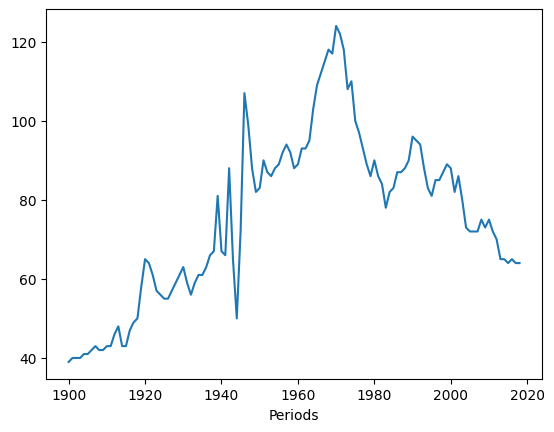

In [80]:
# Now we can plot it, using that same command we used above - plotting a specific value (column) by the index.
# In this case, the index is now the year, which provides a nice little visualization.
df['Marriages_170'].plot()

## Play around - and some (non-graded) homework

The most important thing is that you start playing around. You don't need to be
able to create beautiful plots or anything fancy, but try to get datasets into a
usable format and get some insights!

As an exercise after class, why don't you try the following:

1. Find a webpage that has a table on it.
2. Use the read_html scraper tool we learned above, to scrape the tables and
   save these to a csv file.
3. Read the csv file back into python, and try to find some basic descriptive
   statistics (max, min, mean, etc) and if you can, make a simple visualization
   out of it (histogram or plot).
4. Save all of this to a new notebook--code, notes if you have questions or
   about what you're doing, and output.

If you can do all of these things, great! If you can't bring your questions to
next class.
